# UAS PPW

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

csv_path = '/content/drive/MyDrive/PPW/DataUAS.csv'
df = pd.read_csv(csv_path)
df

Mounted at /content/drive


,Tanggal,Penulis,Judul,Artikel,Label
0,"Selasa, 5 Desember 2023 07:38 WIB",Pewarta: Indra Arief PribadiEditor: Herry Soe...,Jokowi bakal tinjau bendungan dan cek stok ber...,Jakarta (ANTARA) - Presiden RI Joko Wid...,politik
1,"Selasa, 5 Desember 2023 07:00 WIB",NaN,Jadwal debat capres-cawapres Pemilu 2024,Komisi Pemilihan Umum (KPU)siapmenggelar...,politik
2,"Selasa, 5 Desember 2023 06:55 WIB",NaN,"Kaesang janji dorong RUU Perampasan Aset, jika...",ANTARA -Partai Solidarita...,politik
3,"Selasa, 5 Desember 2023 06:41 WIB",Pewarta: Fath Putra MulyaEditor: Herry Soebant...,"Kemarin, pembahasan debat paslon hingga kampan...",Jakarta (ANTARA) - Berbagai peristiwa pol...,politik
4,"Selasa, 5 Desember 2023 06:24 WIB",Pewarta: Fath Putra MulyaEditor: Herry Soebant...,Round up - Hari ketujuh kampanye Pilpres 2024,"Jakarta (ANTARA) - Hari ketujuh kampanye,...",politik
...,...,...,...,...,...
715,"Sabtu, 2 Desember 2023 11:15 WIB",NaN,Aksi Munajat Kubro 212 di Monas,NaN,humaniora
716,"Sabtu, 2 Desember 2023 11:00 WIB",Pewarta: Akhyar RosidiEditor: Risbiani Fardani...,BPJS Kesehatan: 10 kabupaten/kota di NTB telah...,"Praya, Lombok Tengah (ANTARA) - BPJS Kese...",humaniora
717,"Sabtu, 2 Desember 2023 10:48 WIB",Pewarta: Astrid Faidlatul HabibahEditor: Risbi...,Pemkot Surabaya angkat 16 kepala sekolah dari ...,Saya melihat Guru Penggerak diisi oleh orang-...,humaniora
718,"Sabtu, 2 Desember 2023 10:40 WIB",Pewarta: Akhyar RosidiEditor: Risbiani Fardani...,"Tersambar petir, 8 kambing tewas dan warga Bim...",Nyawa korban terselamatkan dan saat ini di ra...,humaniora


# Cleaning data  
Tahap membersihkan data dari noise, menghapus
karakter khusus, menghapus angka dan menghilangkan spasi yang
berlebihan. Cleaning data dengan menggunakan library re

In [2]:
!pip install nltk
!pip install Sastrawi
!pip install joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.7 MB/s eta 0:00:00


In [4]:
import pandas as pd
import nltk
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score
import joblib

In [5]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Missing Value

In [6]:
df.isna().sum()

Tanggal      0
Penulis    128
Judul       10
Artikel     50
Label        0
dtype: int64

In [7]:
data = df.dropna() #menghapus missing value
data.reset_index(drop=True, inplace=True) #atur indeks data mulai dari 0 lagi
data

,Tanggal,Penulis,Judul,Artikel,Label
0,"Selasa, 5 Desember 2023 07:38 WIB",Pewarta: Indra Arief PribadiEditor: Herry Soe...,Jokowi bakal tinjau bendungan dan cek stok ber...,Jakarta (ANTARA) - Presiden RI Joko Wid...,politik
1,"Selasa, 5 Desember 2023 06:41 WIB",Pewarta: Fath Putra MulyaEditor: Herry Soebant...,"Kemarin, pembahasan debat paslon hingga kampan...",Jakarta (ANTARA) - Berbagai peristiwa pol...,politik
2,"Selasa, 5 Desember 2023 06:24 WIB",Pewarta: Fath Putra MulyaEditor: Herry Soebant...,Round up - Hari ketujuh kampanye Pilpres 2024,"Jakarta (ANTARA) - Hari ketujuh kampanye,...",politik
3,"Selasa, 5 Desember 2023 05:07 WIB",Pewarta: Devi Nindy Sari RamadhanEditor: Trion...,"Siti Atikoh: Pemimpin punya keluarga kuat, pas...",Jkarta (ANTARA) - Istri calon presiden RI...,politik
4,"Selasa, 5 Desember 2023 00:31 WIB",Pewarta: Rizka KhaerunnisaEditor: Alviansyah P...,Mahfud: Pilihlah pemimpin berdasarkan hati nur...,Jangan pilih karena dikasih duitJakarta (ANTA...,politik
...,...,...,...,...,...
587,"Sabtu, 2 Desember 2023 12:55 WIB",Pewarta: Willi IrawanEditor: Zita Meirina COP...,Khofifah: SMA Awards ajang siapkan generasi me...,Surabaya (ANTARA) - Gubernur Jawa Timur K...,humaniora
588,"Sabtu, 2 Desember 2023 11:33 WIB",Pewarta: Abdul HakimEditor: Risbiani Fardaniah...,Pemkot Surabaya masifkan upaya pengendalian HIV,"Sedangkan untuk pemberian layanan dukungan, p...",humaniora
589,"Sabtu, 2 Desember 2023 11:00 WIB",Pewarta: Akhyar RosidiEditor: Risbiani Fardani...,BPJS Kesehatan: 10 kabupaten/kota di NTB telah...,"Praya, Lombok Tengah (ANTARA) - BPJS Kese...",humaniora
590,"Sabtu, 2 Desember 2023 10:48 WIB",Pewarta: Astrid Faidlatul HabibahEditor: Risbi...,Pemkot Surabaya angkat 16 kepala sekolah dari ...,Saya melihat Guru Penggerak diisi oleh orang-...,humaniora


In [8]:
total = data['Label'].value_counts()
total

olahraga     201
politik      200
humaniora    191
Name: Label, dtype: int64

In [9]:
data.shape

(592, 5)

In [10]:
berita = data["Artikel"].astype(str)

In [11]:
berita

0           Jakarta (ANTARA) -   Presiden RI Joko Wid...
1           Jakarta (ANTARA) - Berbagai peristiwa pol...
2           Jakarta (ANTARA) - Hari ketujuh kampanye,...
3           Jkarta (ANTARA) - Istri calon presiden RI...
4       Jangan pilih karena dikasih duitJakarta (ANTA...
                             ...                        
587         Surabaya (ANTARA) - Gubernur Jawa Timur K...
588     Sedangkan untuk pemberian layanan dukungan, p...
589         Praya, Lombok Tengah (ANTARA) - BPJS Kese...
590     Saya melihat Guru Penggerak diisi oleh orang-...
591     Nyawa korban terselamatkan dan saat ini di ra...
Name: Artikel, Length: 592, dtype: object

## Lowecase  
proses untuk mengubah semua huruf dalam dokumen
menjadi huruf kecil (lowercase), yang bertujuan untuk memastikan
konsistensi dalam pemrosesan teks. Case folding dengan lowercase

In [12]:
preprocessing = berita.str.lower()

In [13]:
preprocessing

0           jakarta (antara) -   presiden ri joko wid...
1           jakarta (antara) - berbagai peristiwa pol...
2           jakarta (antara) - hari ketujuh kampanye,...
3           jkarta (antara) - istri calon presiden ri...
4       jangan pilih karena dikasih duitjakarta (anta...
                             ...                        
587         surabaya (antara) - gubernur jawa timur k...
588     sedangkan untuk pemberian layanan dukungan, p...
589         praya, lombok tengah (antara) - bpjs kese...
590     saya melihat guru penggerak diisi oleh orang-...
591     nyawa korban terselamatkan dan saat ini di ra...
Name: Artikel, Length: 592, dtype: object

## Tokenisasi  
proses membagi teks menjadi unit-unit terpisah yang
disebut token. Token merupakan unit terkecil dalam teks, yang bisa
berupa kata, frasa, karakter, atau bahkan simbol tertentu. Tujuan dari
tokenisasi adalah untuk mempermudah pemrosesan dan analisis lebih
lanjut terhadap teks. Tokenizing dengan library nltk.tokenize.


In [14]:
def process_tokenize(text):
    text = text.split()
    return text

In [15]:
preprocessing = preprocessing.apply(process_tokenize)
preprocessing

0      [jakarta, (antara), -, presiden, ri, joko, wid...
1      [jakarta, (antara), -, berbagai, peristiwa, po...
2      [jakarta, (antara), -, hari, ketujuh, kampanye...
3      [jkarta, (antara), -, istri, calon, presiden, ...
4      [jangan, pilih, karena, dikasih, duitjakarta, ...
                             ...                        
587    [surabaya, (antara), -, gubernur, jawa, timur,...
588    [sedangkan, untuk, pemberian, layanan, dukunga...
589    [praya,, lombok, tengah, (antara), -, bpjs, ke...
590    [saya, melihat, guru, penggerak, diisi, oleh, ...
591    [nyawa, korban, terselamatkan, dan, saat, ini,...
Name: Artikel, Length: 592, dtype: object

## Punctuation  
Menghapus seluruh tanda baca yang ada pada konten berita Cleaning data dengan menggunakan library re

In [16]:
def process_punctuation(tokens):
    cleaned_tokens = [re.sub(r'[.,()&=%:-]', '', token) for token in tokens]
    cleaned_tokens = [re.sub(r'\d+', '', token) for token in cleaned_tokens]

    return cleaned_tokens

In [17]:
preprocessing = preprocessing.apply(process_punctuation)
preprocessing

0      [jakarta, antara, , presiden, ri, joko, widodo...
1      [jakarta, antara, , berbagai, peristiwa, polit...
2      [jakarta, antara, , hari, ketujuh, kampanye, s...
3      [jkarta, antara, , istri, calon, presiden, ri,...
4      [jangan, pilih, karena, dikasih, duitjakarta, ...
                             ...                        
587    [surabaya, antara, , gubernur, jawa, timur, kh...
588    [sedangkan, untuk, pemberian, layanan, dukunga...
589    [praya, lombok, tengah, antara, , bpjs, keseha...
590    [saya, melihat, guru, penggerak, diisi, oleh, ...
591    [nyawa, korban, terselamatkan, dan, saat, ini,...
Name: Artikel, Length: 592, dtype: object

## stopword  
Tahap menghapus kata-kata yang kurang
berrmakna atau tidak memiliki arti seperti kata: saya, dan, atau. Filtering
stop word dengan library nltk, dengan menggunakan kamus stopword
bahasa Indonesia.


In [18]:
def process_stopword_token(tokens):
    stop_words = set(stopwords.words("indonesian"))
    # custom_stop_words = ['masingmasing','tiaptiap','satusatunya', 'intinya', 'seiring']
    # stop_words.update(custom_stop_words)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return " ".join(filtered_tokens)

In [19]:
preprocessing = preprocessing.apply(process_stopword_token)
preprocessing

0      jakarta  presiden ri joko widodo jokowi kunjun...
1      jakarta  peristiwa politik diwartakan lkbn sen...
2      jakarta  ketujuh kampanye senin / pemilu presi...
3      jkarta  istri calon presiden ri nomor urut  ga...
4      pilih dikasih duitjakarta  calon wakil preside...
                             ...                        
587    surabaya  gubernur jawa timur khofifah indar p...
588    pemberian layanan dukungan perawatan pengobata...
589    praya lombok  bpjs kesehatan  kabupaten/kota p...
590    guru penggerak diisi orangorang muda giat inov...
591    nyawa korban terselamatkan rawat rs sondosia k...
Name: Artikel, Length: 592, dtype: object

## Stemming  
Proses untuk menghapus kata imbuhan untuk mendapatkan
kata dasarnya. Pada proses stemming dengan menggunakan
library sastrawi. PySastrawi adalah sebuah library Python yang
menyediakan fungsi-fungsi untuk melakukan pemrosesan bahasa alami
dalam bahasa Indonesia, seperti stemming (pemenggalan kata ke bentuk
dasarnya).

In [20]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [21]:
preprocessing = preprocessing.apply(lambda text:stemmer.stem(text))
preprocessing

0      jakarta presiden ri joko widodo jokowi kunjung...
1      jakarta peristiwa politik warta lkbn senin bah...
2      jakarta tujuh kampanye senin milu presiden wak...
3      jkarta istri calon presiden ri nomor urut ganj...
4      pilih kasih duitjakarta calon wakil presiden c...
                             ...                        
587    surabaya gubernur jawa timur khofifah indar pa...
588    beri layan dukung awat obat hiv sebar layan pu...
589    praya lombok bpjs sehat kabupaten kota provins...
590    guru gerak isi orangorang muda giat inovasi aj...
591    nyawa korban selamat rawat rs sondosia camat b...
Name: Artikel, Length: 592, dtype: object

In [22]:
data['preprocessing_berita'] = preprocessing
data.to_csv('/content/drive/MyDrive/Colab Notebooks/preprocessing_berita.csv', index=False)

<ipython-input-22-9220397b17b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['preprocessing_berita'] = preprocessing


# fitur ekstraksi  



In [23]:
csv_preprocessing = '/content/drive/MyDrive/Colab Notebooks/preprocessing_berita.csv'
datas = pd.read_csv(csv_preprocessing)
datas

,Tanggal,Penulis,Judul,Artikel,Label,preprocessing_berita
0,"Selasa, 5 Desember 2023 07:38 WIB",Pewarta: Indra Arief PribadiEditor: Herry Soe...,Jokowi bakal tinjau bendungan dan cek stok ber...,Jakarta (ANTARA) - Presiden RI Joko Wid...,politik,jakarta presiden ri joko widodo jokowi kunjung...
1,"Selasa, 5 Desember 2023 06:41 WIB",Pewarta: Fath Putra MulyaEditor: Herry Soebant...,"Kemarin, pembahasan debat paslon hingga kampan...",Jakarta (ANTARA) - Berbagai peristiwa pol...,politik,jakarta peristiwa politik warta lkbn senin bah...
2,"Selasa, 5 Desember 2023 06:24 WIB",Pewarta: Fath Putra MulyaEditor: Herry Soebant...,Round up - Hari ketujuh kampanye Pilpres 2024,"Jakarta (ANTARA) - Hari ketujuh kampanye,...",politik,jakarta tujuh kampanye senin milu presiden wak...
3,"Selasa, 5 Desember 2023 05:07 WIB",Pewarta: Devi Nindy Sari RamadhanEditor: Trion...,"Siti Atikoh: Pemimpin punya keluarga kuat, pas...",Jkarta (ANTARA) - Istri calon presiden RI...,politik,jkarta istri calon presiden ri nomor urut ganj...
4,"Selasa, 5 Desember 2023 00:31 WIB",Pewarta: Rizka KhaerunnisaEditor: Alviansyah P...,Mahfud: Pilihlah pemimpin berdasarkan hati nur...,Jangan pilih karena dikasih duitJakarta (ANTA...,politik,pilih kasih duitjakarta calon wakil presiden c...
...,...,...,...,...,...,...
587,"Sabtu, 2 Desember 2023 12:55 WIB",Pewarta: Willi IrawanEditor: Zita Meirina COP...,Khofifah: SMA Awards ajang siapkan generasi me...,Surabaya (ANTARA) - Gubernur Jawa Timur K...,humaniora,surabaya gubernur jawa timur khofifah indar pa...
588,"Sabtu, 2 Desember 2023 11:33 WIB",Pewarta: Abdul HakimEditor: Risbiani Fardaniah...,Pemkot Surabaya masifkan upaya pengendalian HIV,"Sedangkan untuk pemberian layanan dukungan, p...",humaniora,beri layan dukung awat obat hiv sebar layan pu...
589,"Sabtu, 2 Desember 2023 11:00 WIB",Pewarta: Akhyar RosidiEditor: Risbiani Fardani...,BPJS Kesehatan: 10 kabupaten/kota di NTB telah...,"Praya, Lombok Tengah (ANTARA) - BPJS Kese...",humaniora,praya lombok bpjs sehat kabupaten kota provins...
590,"Sabtu, 2 Desember 2023 10:48 WIB",Pewarta: Astrid Faidlatul HabibahEditor: Risbi...,Pemkot Surabaya angkat 16 kepala sekolah dari ...,Saya melihat Guru Penggerak diisi oleh orang-...,humaniora,guru gerak isi orangorang muda giat inovasi aj...


In [28]:
preprocessing_berita = data["preprocessing_berita"]

## TF-IDF  
Pada Tahap ekstraksi fitur, dilakukan dengan metode TF-IDF (Term
Frequency-Inverse Document Frequency) melibatkan perhitungan nilai TF-IDF
untuk setiap kata dalam setiap dokumen. Menghitung TF adalah menghitung
frekuensi kemunculan setiap kata dalam dokumen tertentu. Kemudian
menghitung DF adalah menghitung jumlah dokumen dalam korpus yang
mengandung kata tertentu. Lalu IDF yaitu menghitung kebalikan dari DF, dapat
dihitung dengan menggunakan rumus logaritma dari jumlah total dokumen
dibagi dengan DF untuk kata tersebut. Dan kemudian TF-IDF yaitu mengalikan
nilai TF dengan nilai IDF untuk setiap kata dalam setiap dokumen. Akan
menghasilkan representasi vektor numerik yang memperhitungkan pentingnya
kata dalam dokumen dan dalam korpus secara keseluruhan

In [29]:
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf = tfidfvectorizer.fit_transform(preprocessing_berita)
tfidf_token = tfidfvectorizer.get_feature_names_out()

In [30]:
tfidf_df = pd.DataFrame(data = tfidf.toarray(), columns = tfidf_token)
tfidf_df

,aa,aac,aah,aalamiin,aamiin,aan,aash,aba,abad,abadi,...,zuhdiar,zuhro,zuhurpunturut,zulfadil,zulfikar,zulfikareditor,zulfikri,zulhas,zulkifli,zverev
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Split Data  
Pembagian dataset dibagi menjadi dua yaitu data training dan data testing. Data training digunakan untuk proses pelatihan. Data testing digunakan untuk testing

In [31]:
X = tfidf_df
y = data['Label']

y

0        politik
1        politik
2        politik
3        politik
4        politik
         ...    
587    humaniora
588    humaniora
589    humaniora
590    humaniora
591    humaniora
Name: Label, Length: 592, dtype: object

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train.head()

,aa,aac,aah,aalamiin,aamiin,aan,aash,aba,abad,abadi,...,zuhdiar,zuhro,zuhurpunturut,zulfadil,zulfikar,zulfikareditor,zulfikri,zulhas,zulkifli,zverev
109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Classification  
Metode Naive Bayes adalah metode klasifikasi yang berdasarkan pada Teorema
Bayes dengan asumsi independensi antara fitur-fitur yang ada. Metode ini cocok untuk digunakan pada data yang memiliki banyak fitur. Pada dasarnya,
algoritma Naive Bayes menghitung probabilitas posterior dari setiap kelas berdasarkan fitur-fitur yang diamati.

In [34]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)
y_pred_naivebayes = naive_bayes_classifier.predict(X_test)

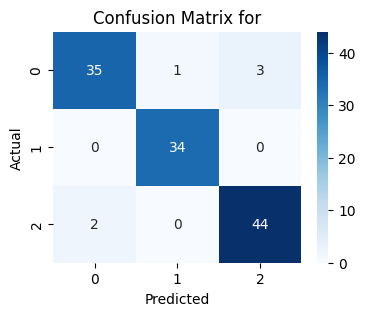

Accuracy = 0.9495798319327731


In [35]:
cm_naivebayes = confusion_matrix(y_test, y_pred_naivebayes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_naivebayes)
accuracy = accuracy_score(y_test, y_pred_naivebayes)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_naivebayes, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for')
plt.show()

print('Accuracy =', accuracy)

In [36]:
joblib.dump(tfidfvectorizer, 'tfidf_vectorizer')

['tfidf_vectorizer']

In [37]:
joblib.dump(naive_bayes_classifier, 'nb_model')

['nb_model']

# Aplikasi Predikisi

Aplikasi untuk klasifikasi berita 👉 [Streamlit](https://uasppw.streamlit.app/)